In [33]:
import pandas as pd
import seaborn as sns

In [16]:
blood_pressure_df = pd.read_excel("datasets/PPG-BP dataset.xlsx", header = 1)

In [17]:
blood_pressure_df

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,1,2,Female,45,152,63,161,89,97,27.268006,Stage 2 hypertension,NaN,NaN,NaN
1,2,3,Female,50,157,50,160,93,76,20.284799,Stage 2 hypertension,NaN,NaN,NaN
2,3,6,Female,47,150,47,101,71,79,20.888889,Normal,NaN,NaN,NaN
3,4,8,Male,45,172,65,136,93,87,21.971336,Prehypertension,NaN,NaN,NaN
4,5,9,Female,46,155,65,123,73,73,27.055151,Prehypertension,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,415,Male,24,180,70,111,70,77,21.604938,Normal,NaN,NaN,NaN
215,216,416,Female,25,156,47,93,57,79,19.312952,Normal,NaN,NaN,NaN
216,217,417,Male,25,176,55,120,69,72,17.755682,Prehypertension,NaN,NaN,NaN
217,218,418,Male,25,173,63,106,69,67,21.049818,Normal,NaN,NaN,NaN


In [18]:
blood_pressure_df.drop(columns = ["subject_ID", "Num.", "Height(cm)", "Weight(kg)"], inplace = True)

In [31]:
blood_pressure_df.isnull().sum() / len(blood_pressure_df) * 100

Sex(M/F)                           0.000000
Age(year)                          0.000000
Systolic Blood Pressure(mmHg)      0.000000
Diastolic Blood Pressure(mmHg)     0.000000
Heart Rate(b/m)                    0.000000
BMI(kg/m^2)                        0.000000
Hypertension                       0.000000
Diabetes                          82.648402
cerebral infarction               90.867580
cerebrovascular disease           88.584475
dtype: float64

In [32]:
blood_pressure_df.drop(columns = ["Diabetes", "cerebral infarction", "cerebrovascular disease"], inplace = True)

In [44]:
pd.unique(blood_pressure_df["Sex(M/F)"])

array(['Female', 'Male'], dtype=object)

In [45]:
pd.unique(blood_pressure_df["Hypertension"])

array(['Stage 2 hypertension', 'Normal', 'Prehypertension',
       'Stage 1 hypertension'], dtype=object)

In [50]:
blood_pressure_df["Sex(M/F)"] = pd.factorize(blood_pressure_df["Sex(M/F)"])[0]

In [52]:
blood_pressure_df["Hypertension"] = pd.factorize(blood_pressure_df["Hypertension"])[0]

In [53]:
blood_pressure_df

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension
0,0,45,161,89,97,27.268006,0
1,0,50,160,93,76,20.284799,0
2,0,47,101,71,79,20.888889,1
3,1,45,136,93,87,21.971336,2
4,0,46,123,73,73,27.055151,2
...,...,...,...,...,...,...,...
214,1,24,111,70,77,21.604938,1
215,0,25,93,57,79,19.312952,1
216,1,25,120,69,72,17.755682,2
217,1,25,106,69,67,21.049818,1


In [ ]:
corr_matrix = blood_pressure_df.corr()

<Axes: ylabel='Age(year)'>

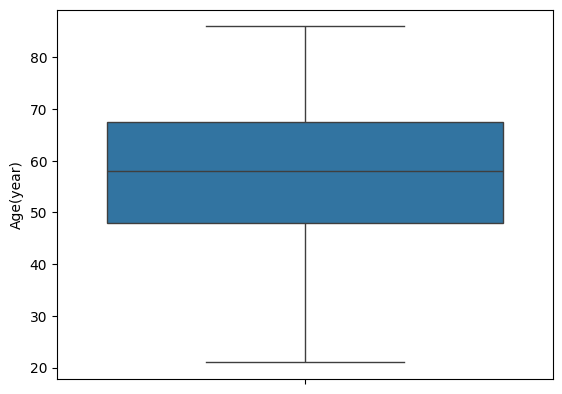

In [158]:
sns.boxplot(data = blood_pressure_df["Age(year)"])

<Axes: ylabel='Systolic Blood Pressure(mmHg)'>

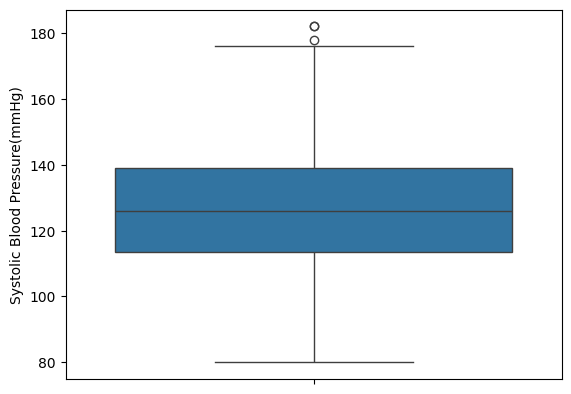

In [159]:
sns.boxplot(data = blood_pressure_df["Systolic Blood Pressure(mmHg)"])

<Axes: ylabel='Diastolic Blood Pressure(mmHg)'>

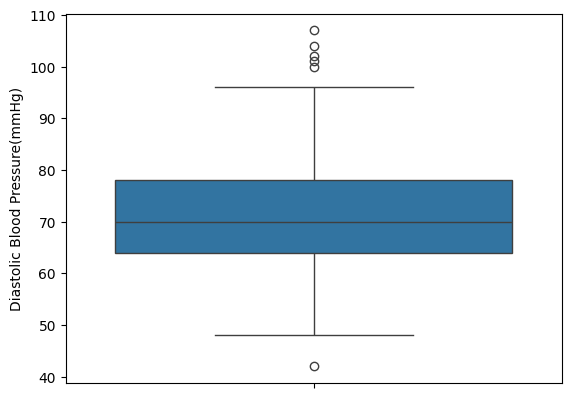

In [161]:
sns.boxplot(data = blood_pressure_df["Diastolic Blood Pressure(mmHg)"])

<Axes: ylabel='Heart Rate(b/m)'>

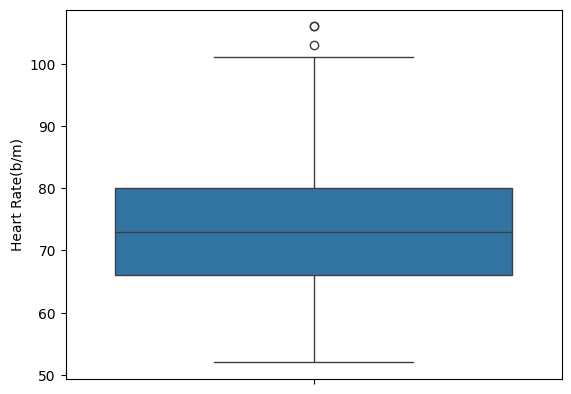

In [162]:
sns.boxplot(data = blood_pressure_df["Heart Rate(b/m)"])

<Axes: ylabel='BMI(kg/m^2)'>

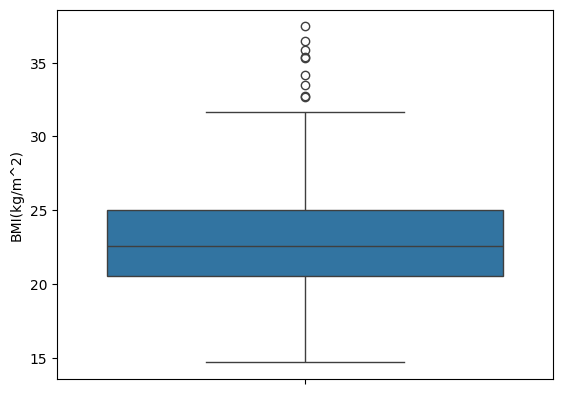

In [163]:
sns.boxplot(data = blood_pressure_df["BMI(kg/m^2)"])

<Axes: >

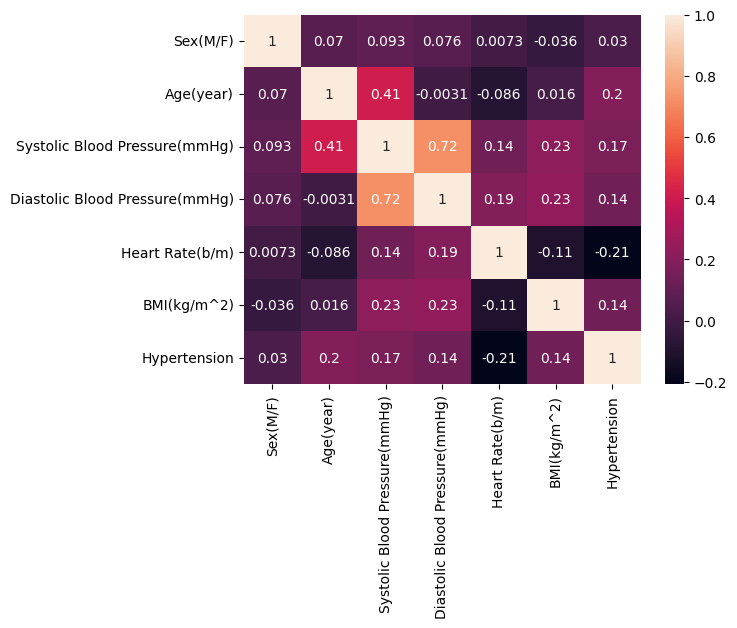

In [66]:
sns.heatmap(data = corr_matrix, annot=True)

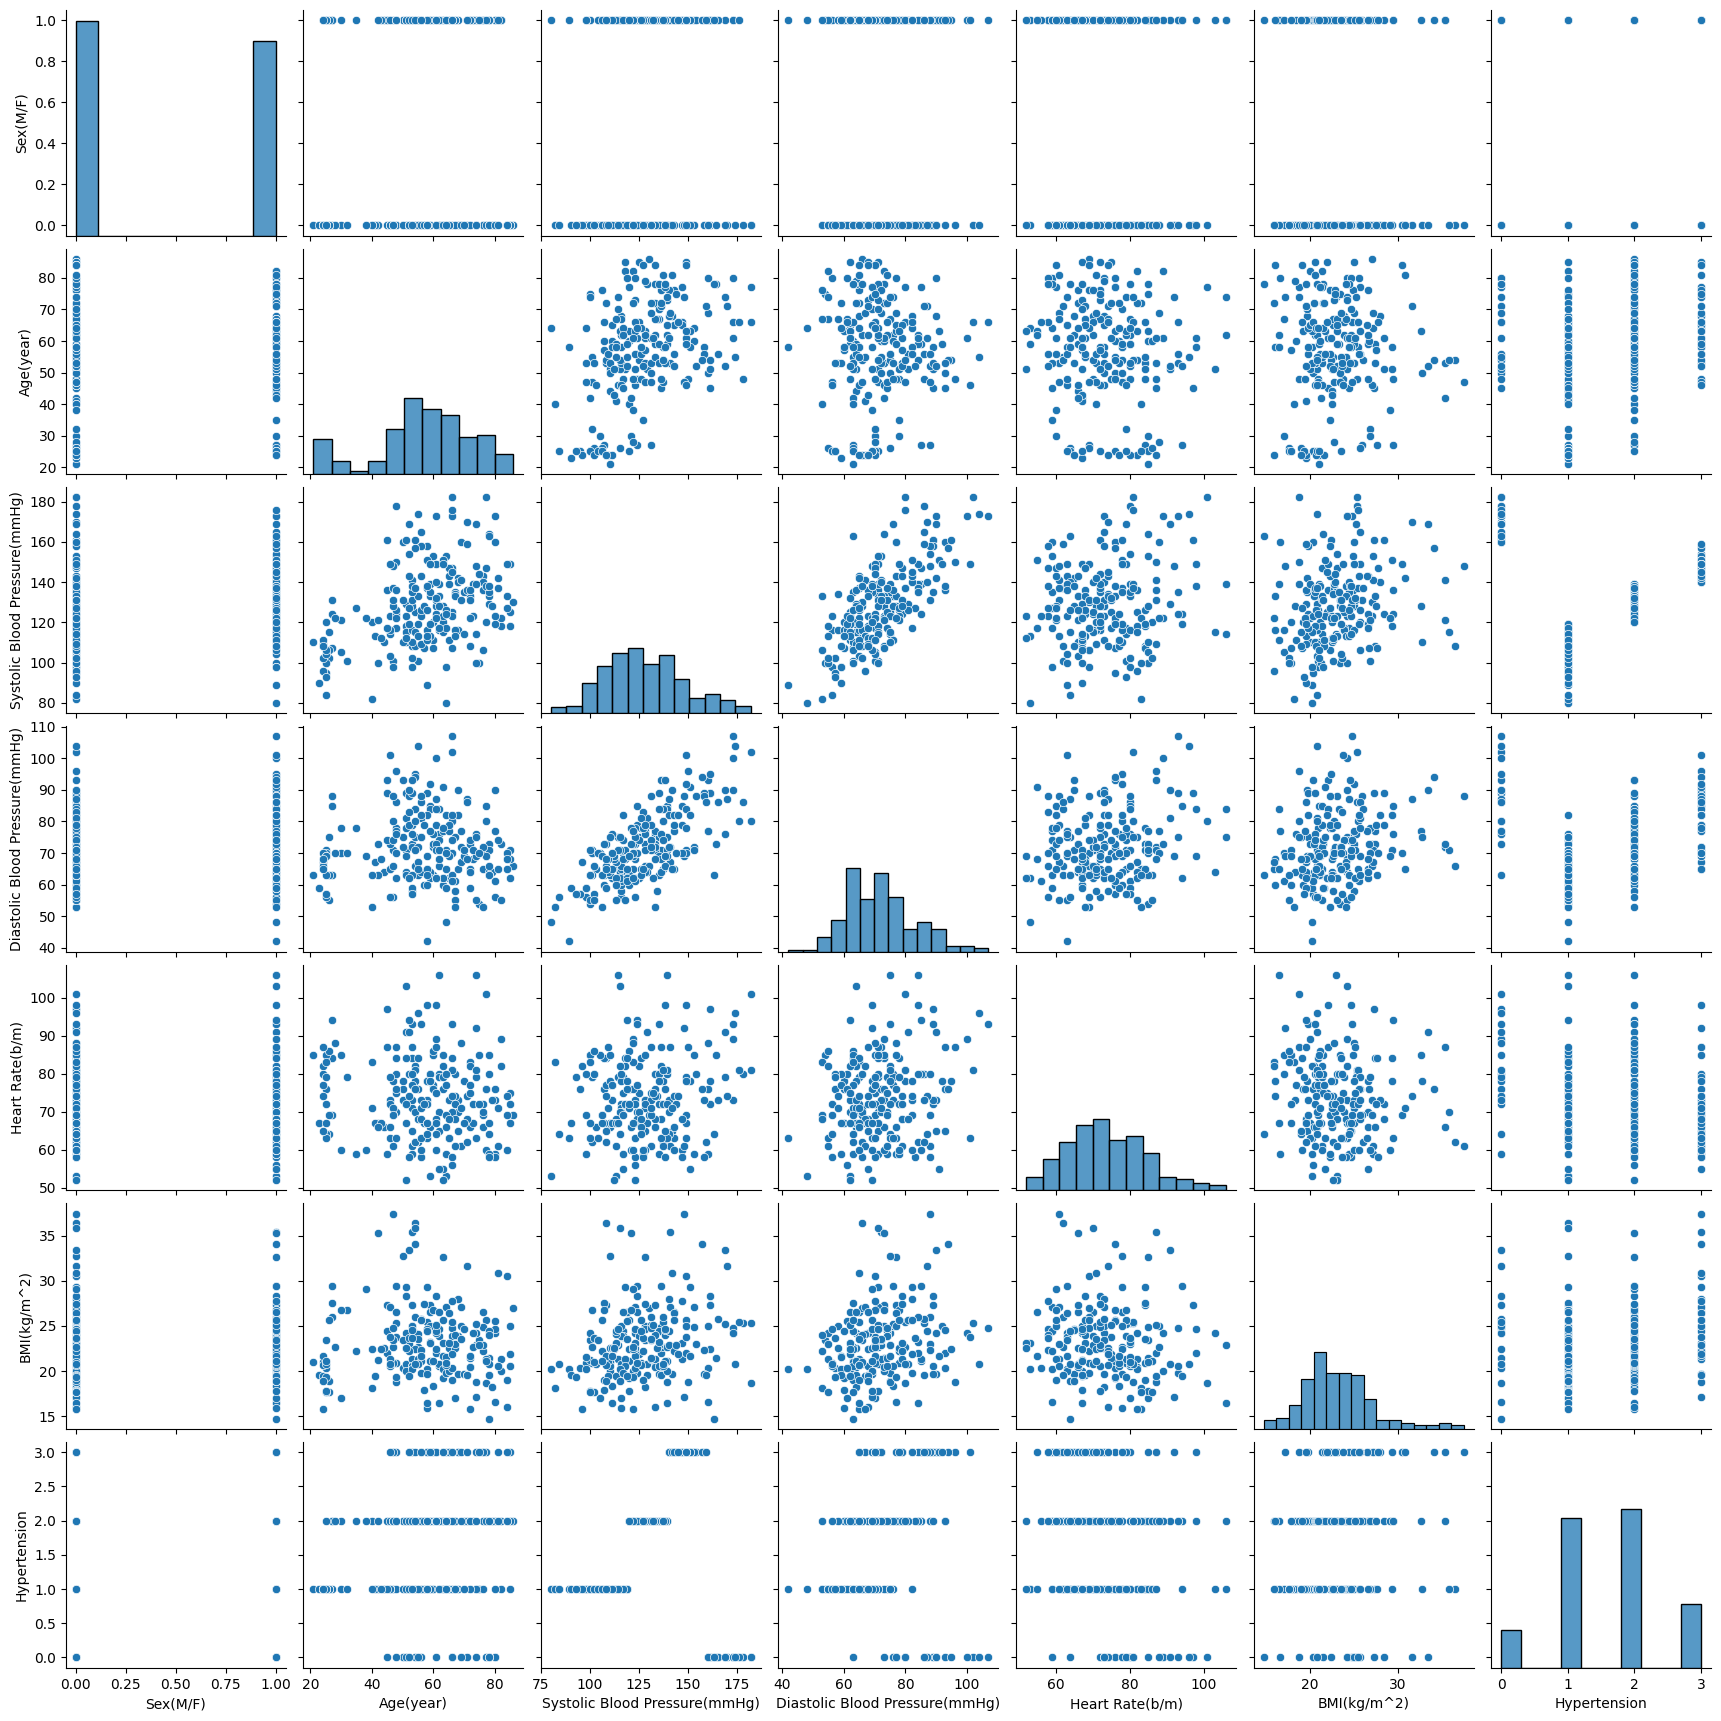

In [165]:
sns.pairplot(data = blood_pressure_df)

In [166]:
bp_df_dummies = pd.get_dummies(blood_pressure_df["Hypertension"])

In [167]:
bp_df_dummies

,0,1,2,3
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
214,False,True,False,False
215,False,True,False,False
216,False,False,True,False
217,False,True,False,False


In [208]:
bp_df_dummies = pd.merge(blood_pressure_df[blood_pressure_df.columns[:6]], bp_df_dummies, left_index=True, right_index=True)

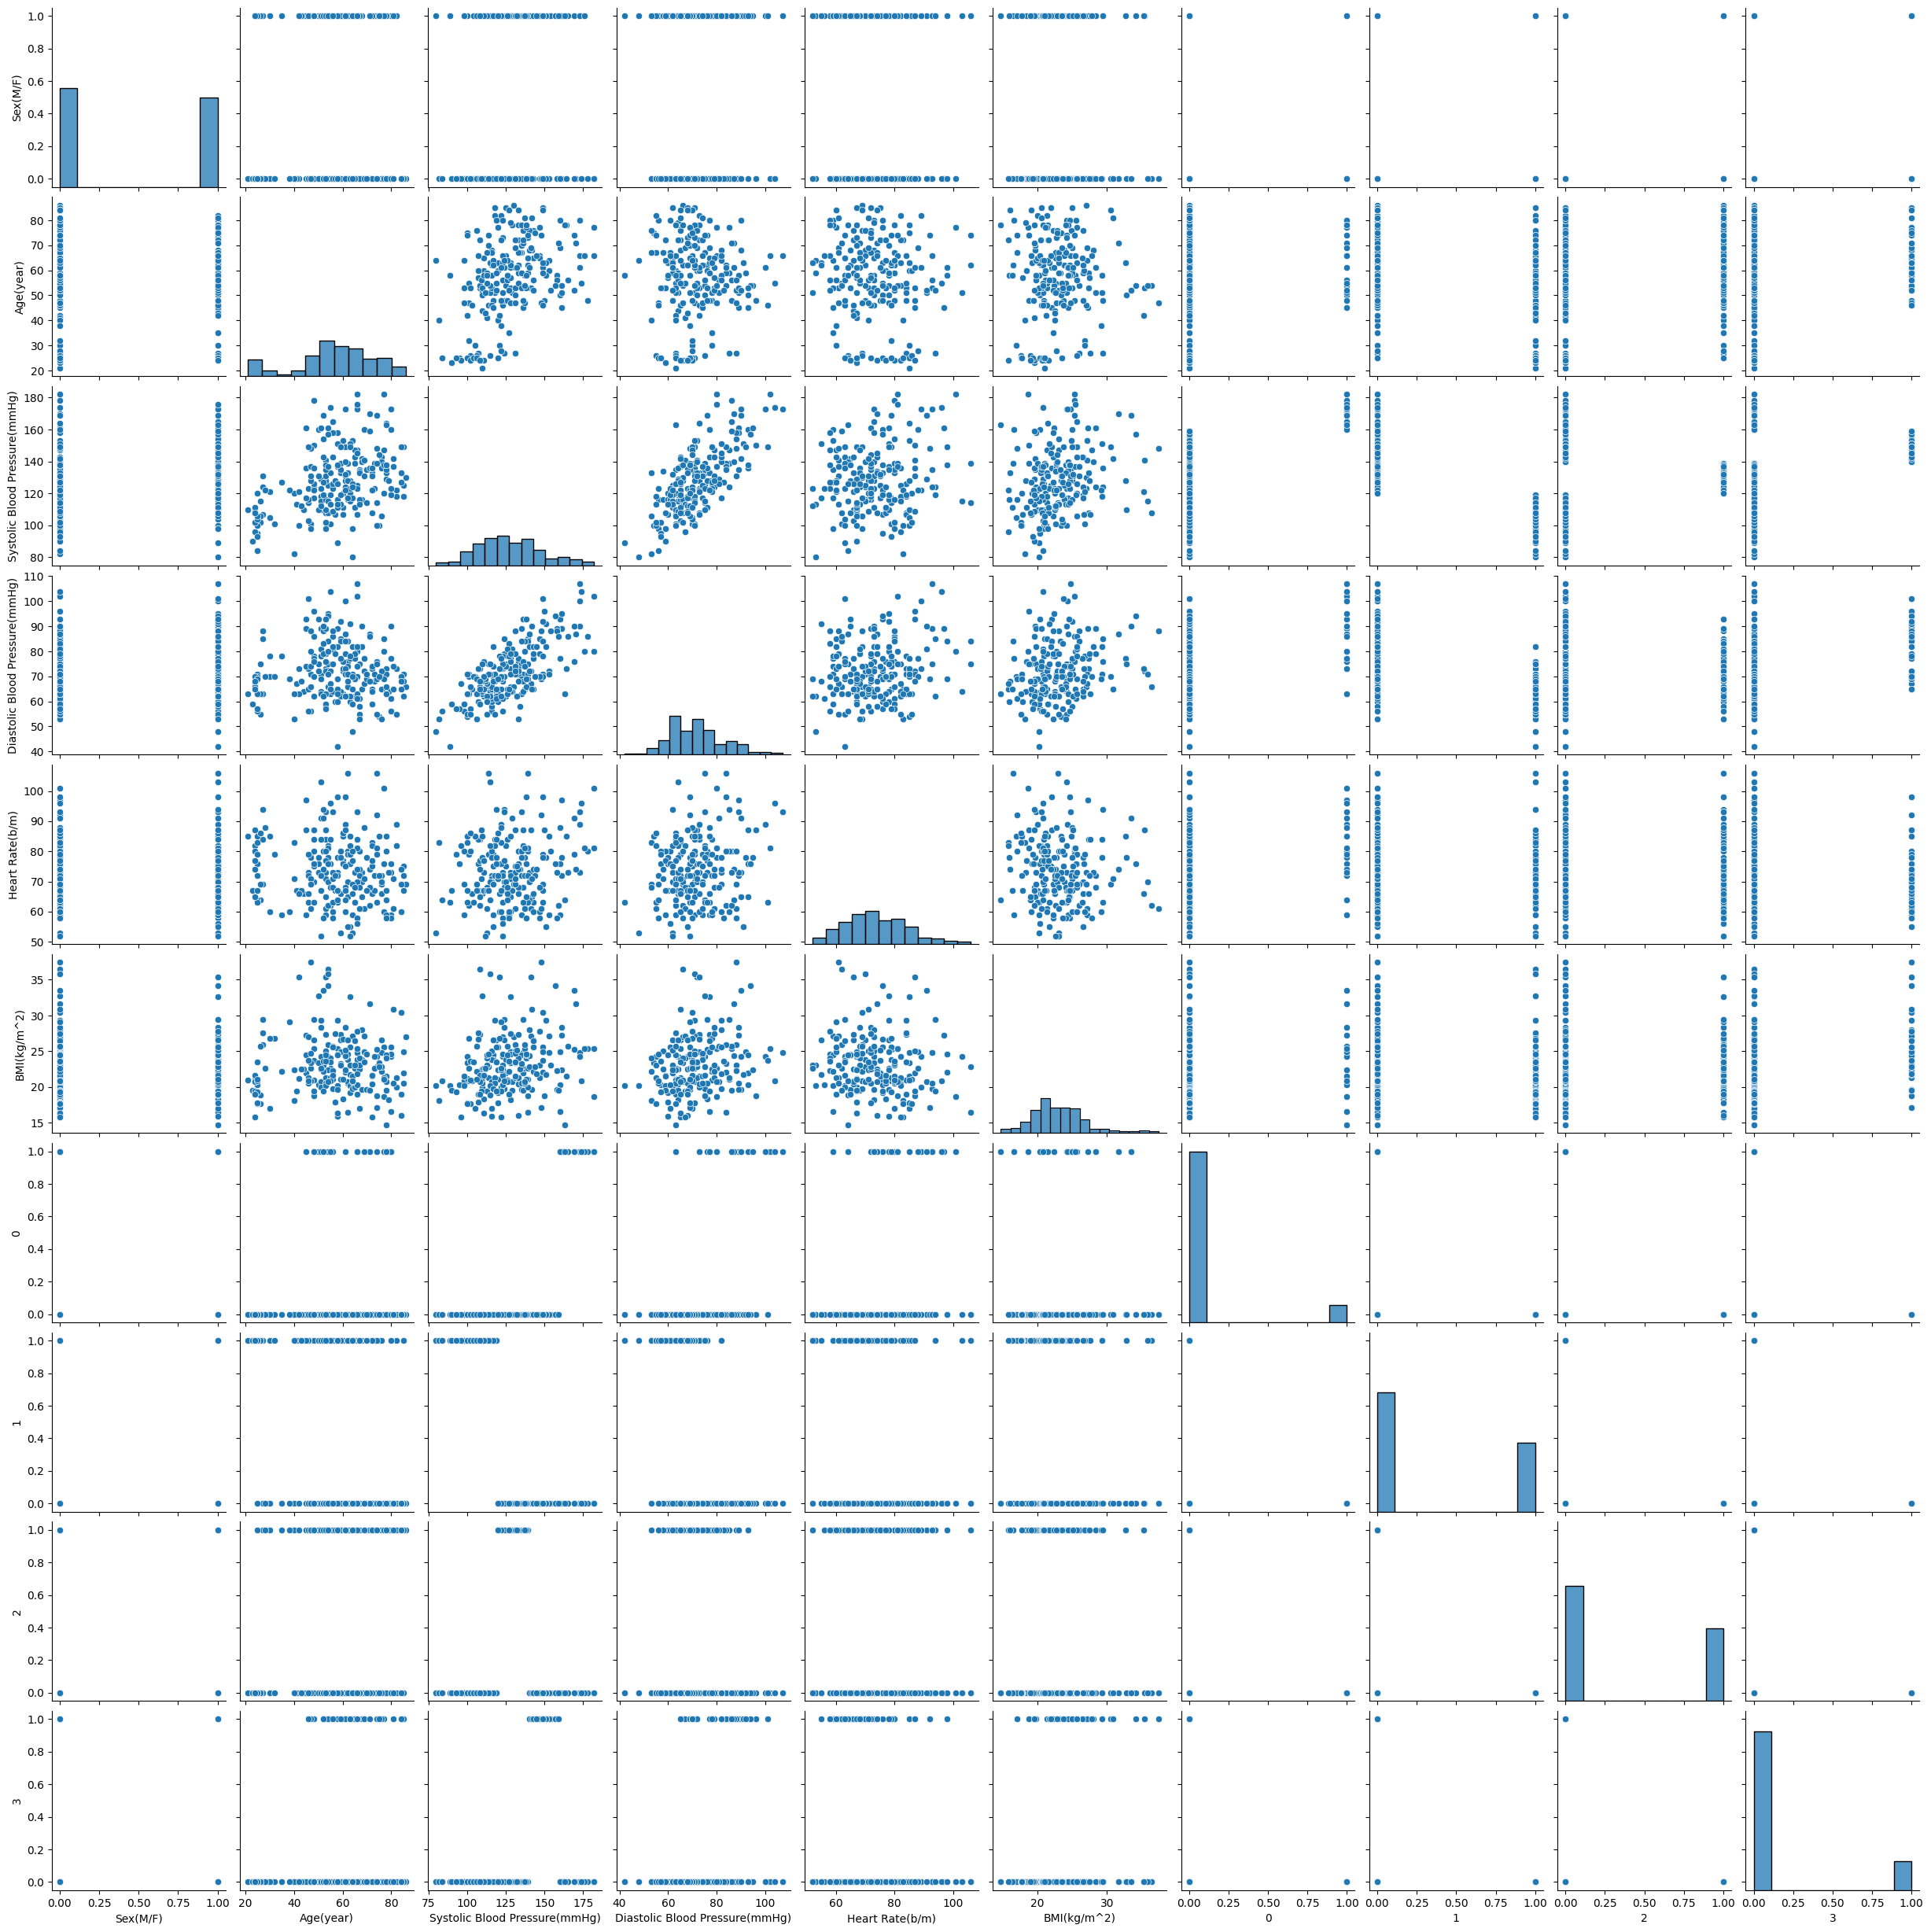

In [209]:
sns.pairplot(data = bp_df_dummies)

<Axes: >

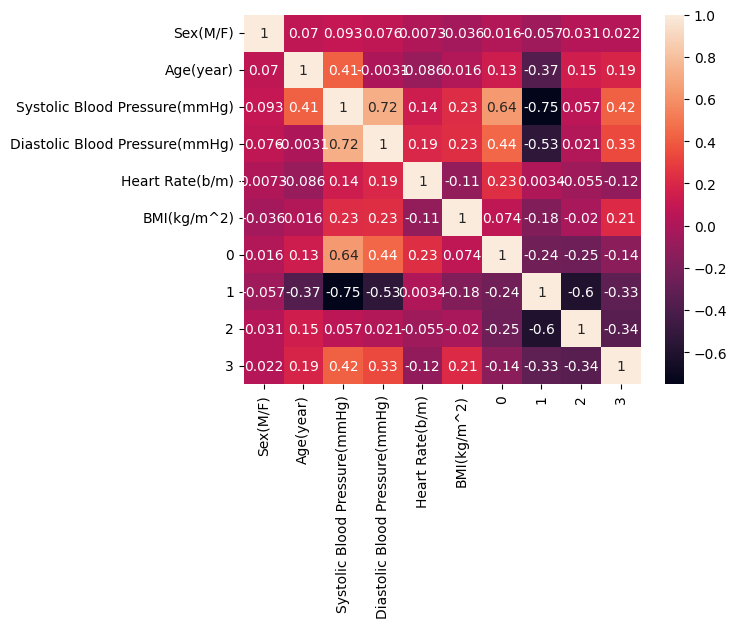

In [213]:
corr_matrix = bp_df_dummies.corr()
sns.heatmap(data = corr_matrix, annot=True)

<Axes: xlabel='Age(year)', ylabel='Count'>

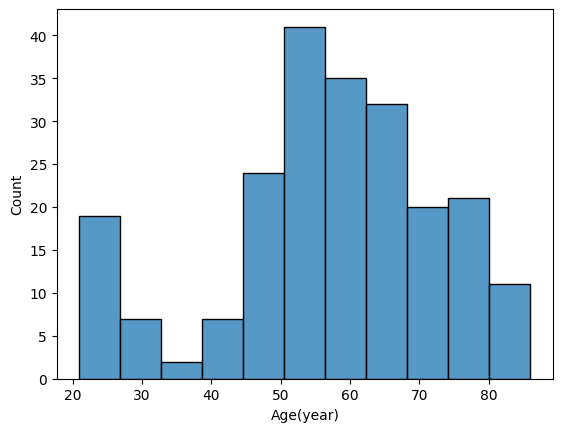

In [214]:
sns.histplot(x = bp_df_dummies["Age(year)"])

<Axes: ylabel='Density'>

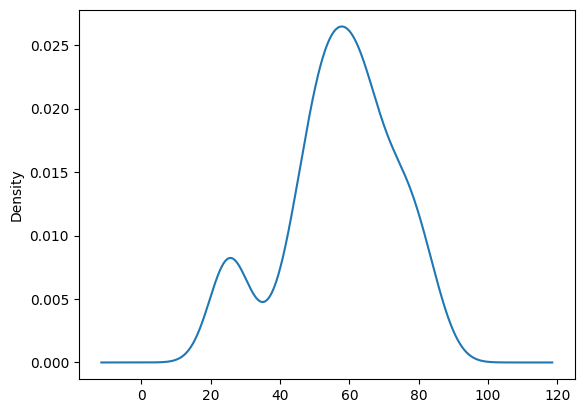

In [217]:
bp_df_dummies["Age(year)"].plot(kind = "kde")

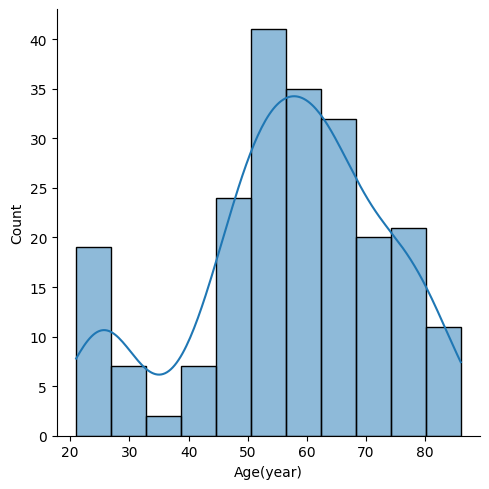

In [220]:
sns.displot(bp_df_dummies["Age(year)"], kde = True)

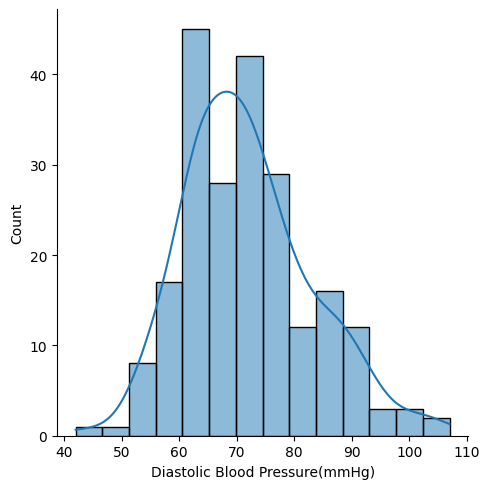

In [221]:
sns.displot(bp_df_dummies["Diastolic Blood Pressure(mmHg)"], kde = True)

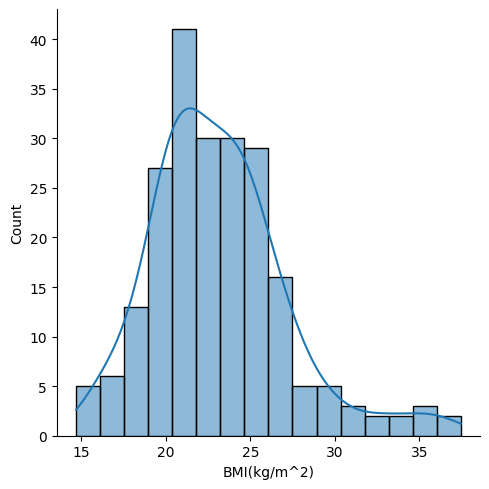

In [222]:
sns.displot(bp_df_dummies["BMI(kg/m^2)"], kde = True)